In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importing data from GitHub

url = 'https://raw.githubusercontent.com/shashikant17/ML_Project/main/ALF.csv'
df = pd.read_csv(url)

In [ ]:
# show data
df

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Dyslipidemia,PVD,Physical Activity,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,0,0,3.0,Governament Hospital,0.0,1,0.0,0.0,1.0,0.0,0.0,Negative
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,0,0,3.0,Never Counsulted,0.0,0,0.0,0.0,0.0,0.0,0.0,Negative
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,1,0,1.0,Never Counsulted,0.0,1,0.0,1.0,0.0,0.0,0.0,Negative
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,0,0,2.0,Private Hospital,0.0,1,0.0,0.0,0.0,0.0,0.0,Negative
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,0,0,1.0,clinic,0.0,0,1.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,F,east,109.3,185.8,31.66,1.0,117.2,149.0,77.0,33.0,189.0,0,0,2.0,Private Hospital,0.0,1,1.0,0.0,0.0,0.0,0.0,Positive
5996,49,F,east,86.6,168.9,30.36,1.0,99.5,130.0,75.0,38.0,123.0,0,0,2.0,Private Hospital,0.0,0,1.0,0.0,0.0,0.0,0.0,Negative
5997,30,F,north,78.0,174.9,25.50,0.0,89.2,126.0,83.0,40.0,131.0,0,0,1.0,clinic,0.0,0,0.0,0.0,0.0,0.0,0.0,Negative
5998,75,F,north,78.8,176.5,25.30,0.0,100.4,129.0,50.0,58.0,134.0,0,0,1.0,Private Hospital,0.0,1,1.0,1.0,0.0,0.0,0.0,Negative


In [ ]:
# copying data in data variable
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6000 non-null   int64  
 1   Gender                  6000 non-null   object 
 2   Region                  6000 non-null   object 
 3   Weight                  5867 non-null   float64
 4   Height                  5861 non-null   float64
 5   Body Mass Index         5794 non-null   float64
 6   Obesity                 5794 non-null   float64
 7   Waist                   5785 non-null   float64
 8   Maximum Blood Pressure  5794 non-null   float64
 9   Minimum Blood Pressure  5748 non-null   float64
 10  Good Cholesterol        5992 non-null   float64
 11  Bad Cholesterol         5992 non-null   float64
 12  Dyslipidemia            6000 non-null   int64  
 13  PVD                     6000 non-null   int64  
 14  Physical Activity       5992 non-null   

In [ ]:
total_missingvalues = data.isnull().sum()
total_missingvalues

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Dyslipidemia                0
PVD                         0
Physical Activity           8
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Diabetes                    1
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [ ]:
data.columns

Index(['Age', 'Gender', 'Region', 'Weight', 'Height', 'Body Mass Index',
       'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Dyslipidemia', 'PVD',
       'Physical Activity', 'Source of Care', 'PoorVision',
       'Alcohol Consumption', 'HyperTension', 'Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


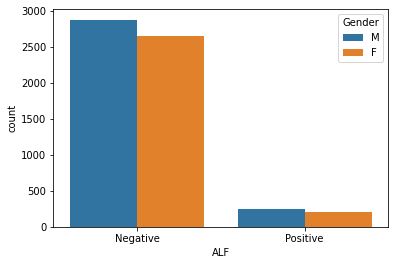

In [ ]:
# Ploting Graph for Dataset
sns.countplot(data['ALF']  , hue='Gender' ,   data=data)

In [ ]:
# sns.countplot(x=data['Gender']  , hue='ALF' ,   data=data)

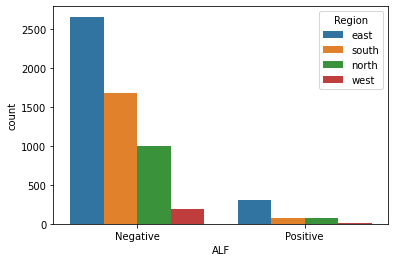

In [ ]:
sns.countplot(x=data['ALF']  , hue='Region' ,   data=data)

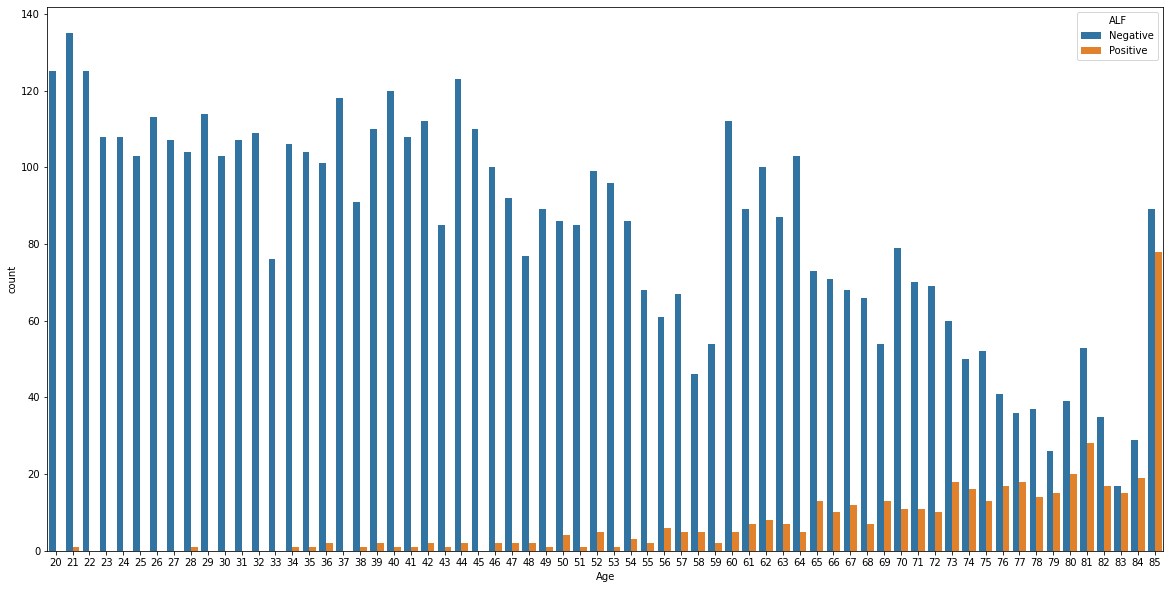

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x=data['Age'],hue='ALF',data=data)

In [ ]:
# sns.pairplot(data)

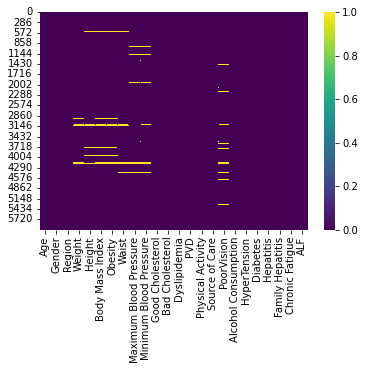

In [ ]:
sns.heatmap(data.isnull() , cmap='viridis')

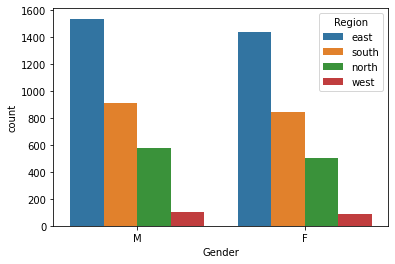

In [ ]:
sns.countplot(x=data['Gender']  , hue='Region' ,   data=data)

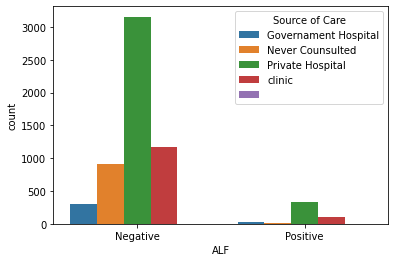

In [ ]:
sns.countplot(x=data['ALF']  , hue='Source of Care' ,   data=data)

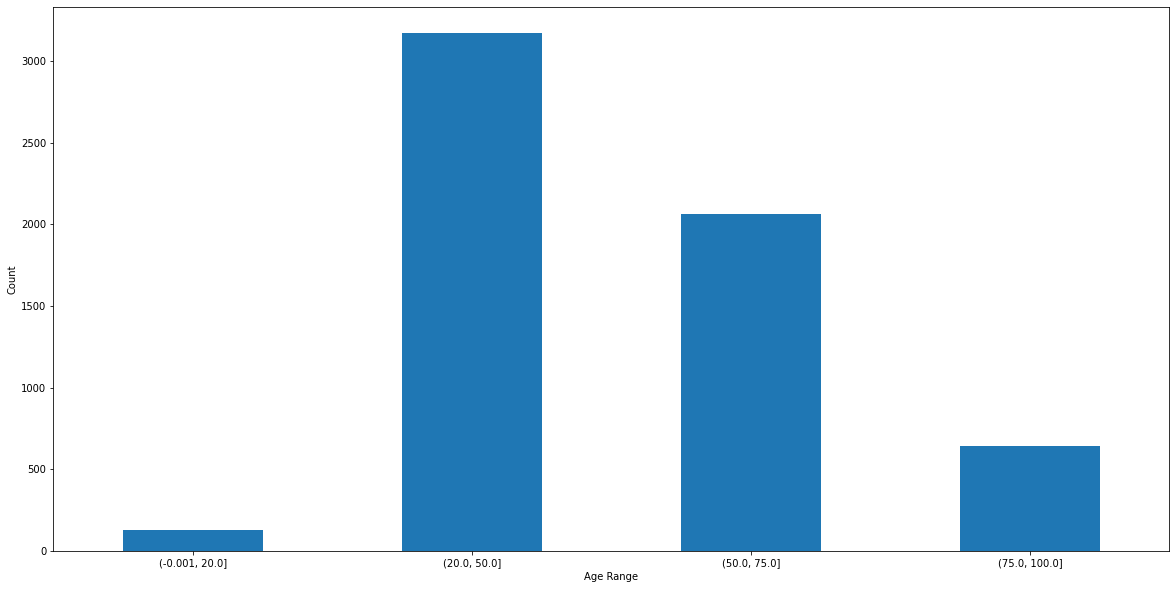

In [ ]:
bins = [0, 20, 50, 75, 100]

out = pd.cut(
    data.Age, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(rot=0,figsize=(20,10))

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

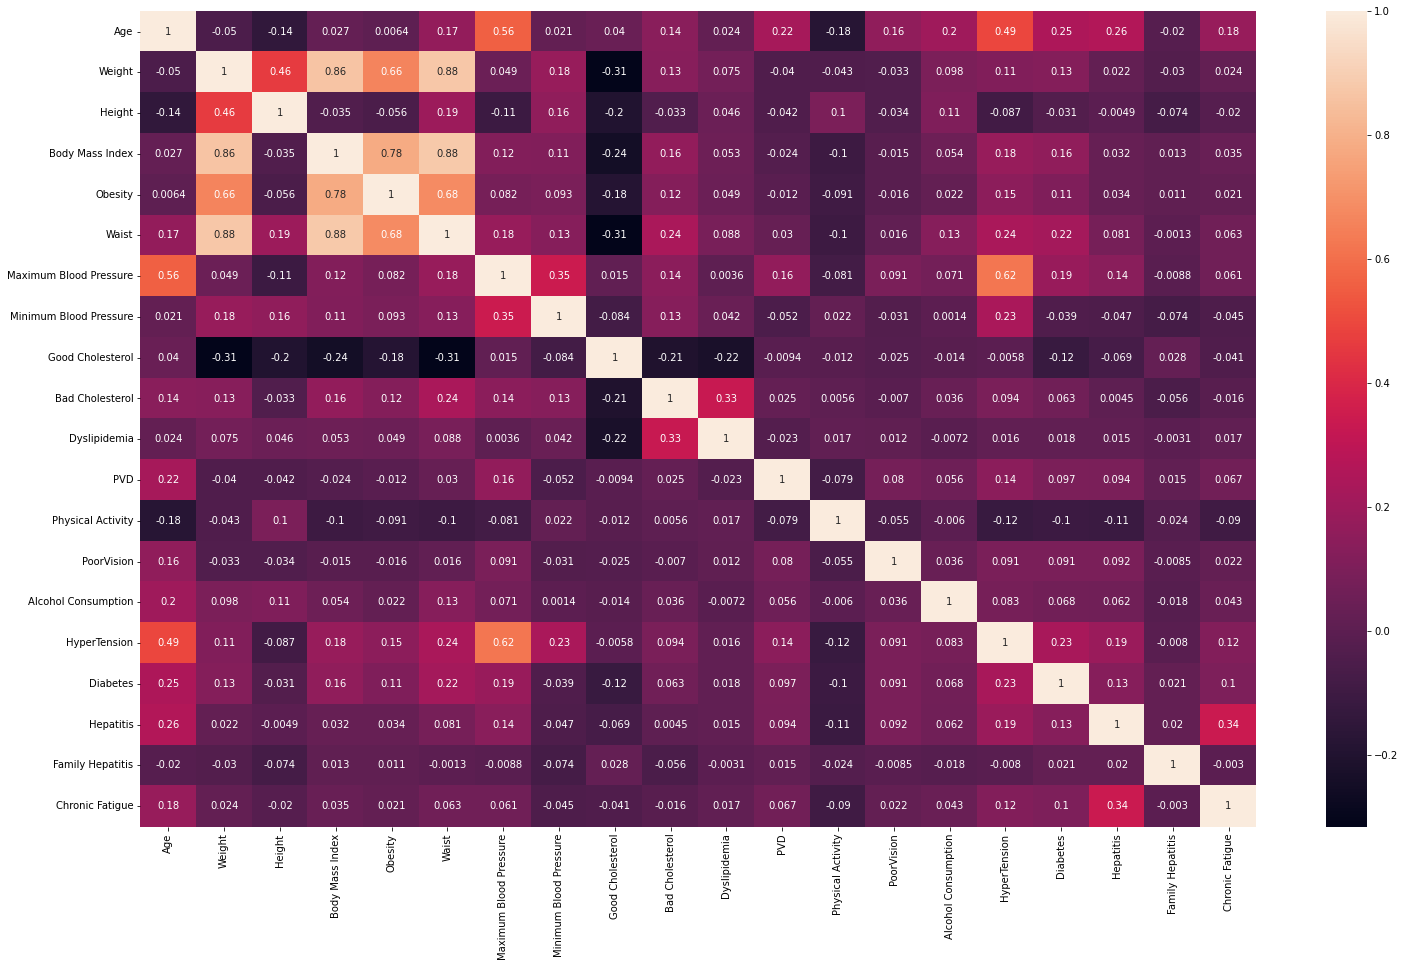

In [ ]:
corr = data.corr()
fig,ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns,ax=ax)

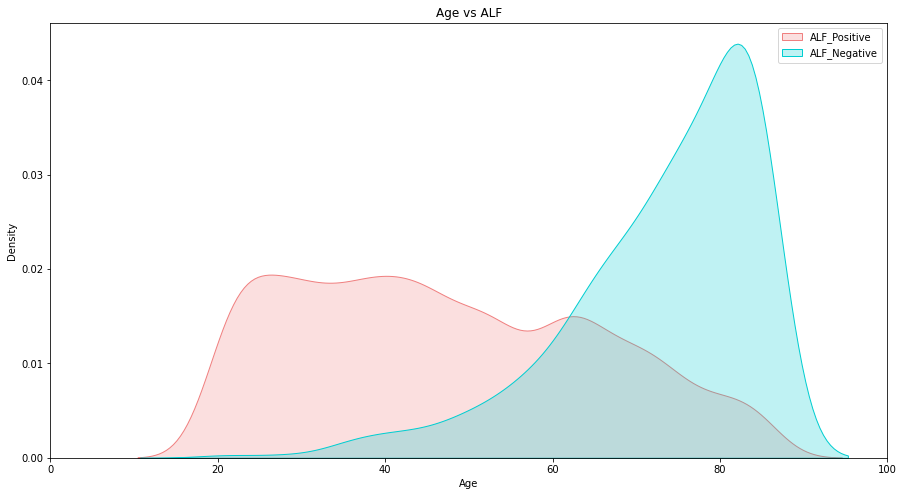

In [ ]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data.Age[data.ALF == 'Negative'], 
    color="lightcoral", 
    shade=True
)

sns.kdeplot(
    data.Age[data.ALF == 'Positive'], 
    color="darkturquoise", 
    shade=True
)

plt.legend(['ALF_Positive', 'ALF_Negative'])
plt.title('Age vs ALF')
plt.xlim(0,100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


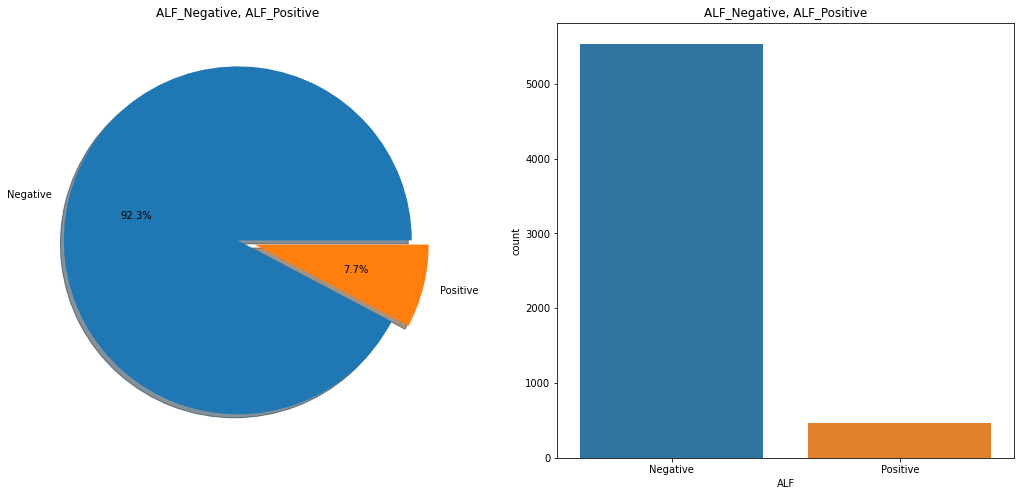

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))

data['ALF'].value_counts().plot.pie(
    explode=[0,0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)

ax[0].set_title('ALF_Negative, ALF_Positive')
ax[0].set_ylabel('')

sns.countplot(
    'ALF',
    data=data,ax=ax[1]
)

ax[1].set_title('ALF_Negative, ALF_Positive')
plt.show()

In [ ]:
data['Source of Care'].unique()

array(['Governament Hospital', 'Never Counsulted', 'Private Hospital',
       'clinic', ' '], dtype=object)

In [ ]:
data["Source of Care"]=data["Source of Care"].apply(lambda x: np.NaN if str(x).isspace() else x)

In [ ]:
data['Source of Care'].unique()

array(['Governament Hospital', 'Never Counsulted', 'Private Hospital',
       'clinic', nan], dtype=object)

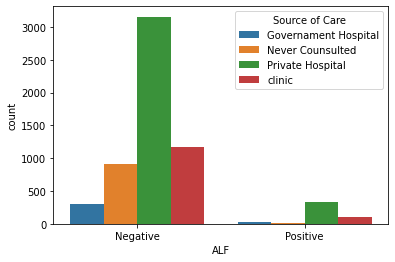

In [ ]:
sns.countplot(x=data['ALF']  , hue='Source of Care' ,   data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6000 non-null   int64  
 1   Gender                  6000 non-null   object 
 2   Region                  6000 non-null   object 
 3   Weight                  5867 non-null   float64
 4   Height                  5861 non-null   float64
 5   Body Mass Index         5794 non-null   float64
 6   Obesity                 5794 non-null   float64
 7   Waist                   5785 non-null   float64
 8   Maximum Blood Pressure  5794 non-null   float64
 9   Minimum Blood Pressure  5748 non-null   float64
 10  Good Cholesterol        5992 non-null   float64
 11  Bad Cholesterol         5992 non-null   float64
 12  Dyslipidemia            6000 non-null   int64  
 13  PVD                     6000 non-null   int64  
 14  Physical Activity       5992 non-null   

In [ ]:
data = pd.get_dummies(data,
                      columns=["Gender","Region","Source of Care","ALF"],
                      prefix=["Gender","Region","Source_of_Care","ALF"]
                    )

In [ ]:
data.head(20)

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Dyslipidemia,PVD,Physical Activity,PoorVision,Alcohol Consumption,HyperTension,Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,Gender_F,Gender_M,Region_east,Region_north,Region_south,Region_west,Source_of_Care_Governament Hospital,Source_of_Care_Never Counsulted,Source_of_Care_Private Hospital,Source_of_Care_clinic,ALF_Negative,ALF_Positive
0,65,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,0,0,3.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0,1,1,0,0,0,1,0,0,0,1,0
1,36,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,0,0,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
2,66,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,1,0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,1,0
3,54,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,0,0,2.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,1,0
4,63,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,0,0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,1,1,0
5,26,119.3,193.2,31.96,1.0,117.9,129.0,70.0,43.0,159.0,0,0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,1,0,1,0
6,66,85.1,172.1,28.73,0.0,99.2,137.0,92.0,41.0,143.0,0,0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,1,0,1,0
7,59,69.9,160.9,27.00,0.0,101.5,124.0,73.0,43.0,140.0,0,0,2.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,1,0
8,53,75.2,174.1,24.81,0.0,85.6,110.0,74.0,62.0,110.0,0,0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,1,0
9,78,47.6,155.3,19.74,0.0,70.3,170.0,78.0,105.0,90.0,0,0,1.0,0.0,0,1.0,1.0,1.0,0.0,NaN,0,1,0,1,0,0,0,0,1,0,1,0


In [ ]:
data = data.drop(columns=['Gender_F','Region_west','Source_of_Care_Never Counsulted','ALF_Negative'],
                axis=1)

In [ ]:
# y = data['ALF_Positive']
# data = data.drop('ALF_Positive', axis=1)

In [ ]:
# from sklearn.impute import SimpleImputer

In [ ]:
# imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
data.columns

Index(['Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist',
       'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol',
       'Bad Cholesterol', 'Dyslipidemia', 'PVD', 'Physical Activity',
       'PoorVision', 'Alcohol Consumption', 'HyperTension', 'Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south',
       'Source_of_Care_Governament Hospital',
       'Source_of_Care_Private Hospital', 'Source_of_Care_clinic',
       'ALF_Positive'],
      dtype='object')

In [ ]:
total_missingvalues = data.isnull().sum()
total_missingvalues

Age                                      0
Weight                                 133
Height                                 139
Body Mass Index                        206
Obesity                                206
Waist                                  215
Maximum Blood Pressure                 206
Minimum Blood Pressure                 252
Good Cholesterol                         8
Bad Cholesterol                          8
Dyslipidemia                             0
PVD                                      0
Physical Activity                        8
PoorVision                             376
Alcohol Consumption                      0
HyperTension                            53
Diabetes                                 1
Hepatitis                               13
Family Hepatitis                         3
Chronic Fatigue                         26
Gender_M                                 0
Region_east                              0
Region_north                             0
Region_sout

In [ ]:
data = data.dropna(axis=0, subset=['Chronic Fatigue','Family Hepatitis','Hepatitis','Diabetes',
                                   'HyperTension','PoorVision','Physical Activity','Bad Cholesterol',
                                   'Good Cholesterol','Weight', 'Height', 'Body Mass Index',
                                   'Obesity', 'Waist', 'Maximum Blood Pressure',
                                   'Minimum Blood Pressure'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 0 to 5999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  5214 non-null   int64  
 1   Weight                               5214 non-null   float64
 2   Height                               5214 non-null   float64
 3   Body Mass Index                      5214 non-null   float64
 4   Obesity                              5214 non-null   float64
 5   Waist                                5214 non-null   float64
 6   Maximum Blood Pressure               5214 non-null   float64
 7   Minimum Blood Pressure               5214 non-null   float64
 8   Good Cholesterol                     5214 non-null   float64
 9   Bad Cholesterol                      5214 non-null   float64
 10  Dyslipidemia                         5214 non-null   int64  
 11  PVD                           

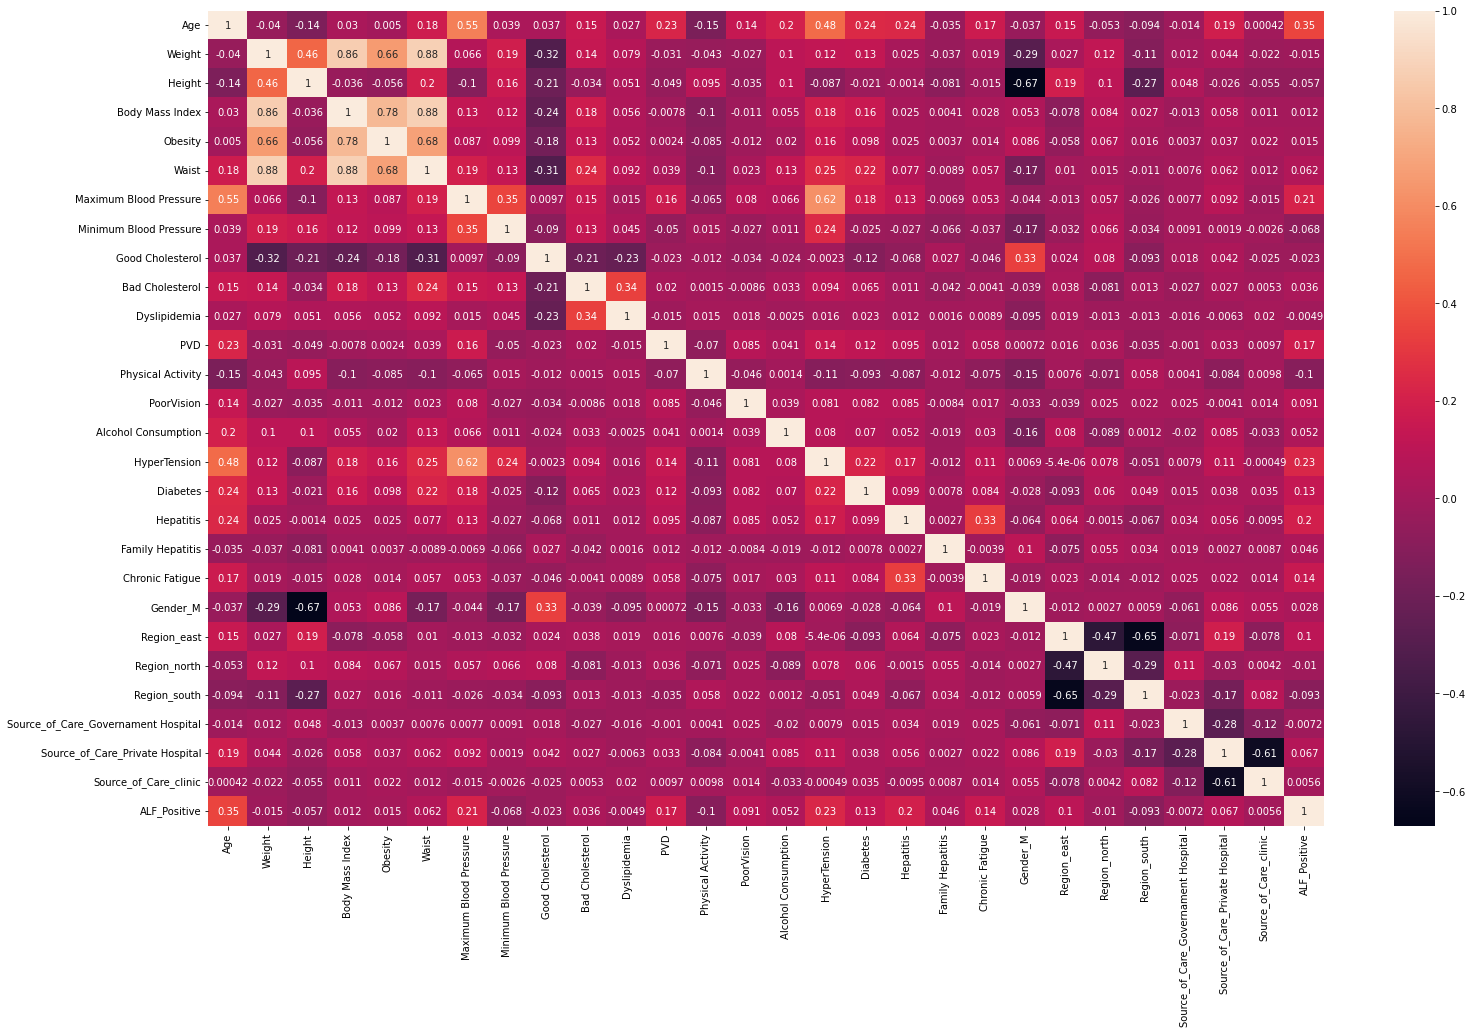

In [ ]:
corr = data.corr()
fig,ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns,ax=ax)

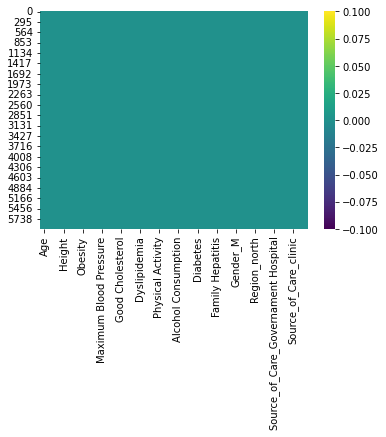

In [ ]:
sns.heatmap(data.isnull() , cmap='viridis')

In [ ]:
y = data['ALF_Positive']
data = data.drop('ALF_Positive', axis=1)

In [ ]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
sc = StandardScaler()
X = sc.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 42)

## Keras Sequential

In [ ]:
# from keras import Sequential
# from keras.layers import Dense

In [ ]:
# classifier = Sequential()
# #First Hidden Layer
# classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
# #Second  Hidden Layer
# classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
# #Output Layer
# classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
# #Compiling the neural network
# classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
# #Fitting the data to the training dataset
# classifier.fit(X_train,y_train, batch_size=10, epochs=10)

In [ ]:
# y_pred=classifier.predict(X_test)
# y_pred =(y_pred>0.5)

In [ ]:
# accuracy_score(y_test,y_pred)

In [ ]:
# recall_score(y_test,y_pred)

# ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(solver='lbfgs',random_state=42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1462,    8],
       [  86,    9]])

Text(0.5, 257.44, 'Predicted label')

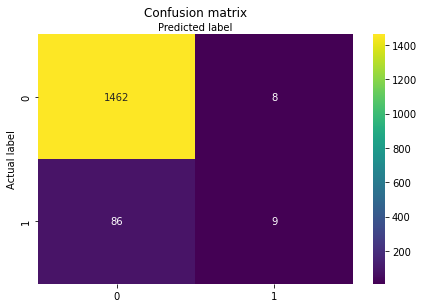

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.colormaps()
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusionMatrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [ ]:
accuracy_score(y_test,y_pred)

0.9399361022364218

In [ ]:
precision_score(y_test,y_pred)

0.5294117647058824

In [ ]:
recall_score(y_test,y_pred)

0.09473684210526316

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1470
           1       0.53      0.09      0.16        95

    accuracy                           0.94      1565
   macro avg       0.74      0.54      0.56      1565
weighted avg       0.92      0.94      0.92      1565



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error for RF = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for RF = %f " % (accuracy*100) + '%' )

Error for RF = 6.325879 %
Accuracy for RF = 93.674121 %


In [ ]:
confusionMatrix = confusion_matrix(y_test,y_pred)

Text(0.5, 257.44, 'Predicted label')

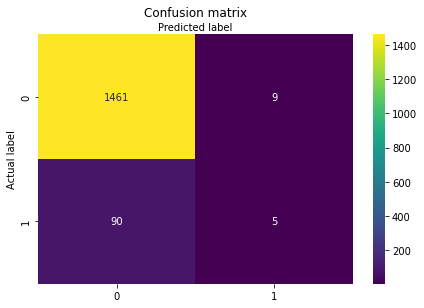

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.colormaps()
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusionMatrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [ ]:
accuracy_score(y_test,y_pred)

0.936741214057508

In [ ]:
precision_score(y_test,y_pred)

0.35714285714285715

In [ ]:
recall_score(y_test,y_pred)

0.05263157894736842

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1470
           1       0.36      0.05      0.09        95

    accuracy                           0.94      1565
   macro avg       0.65      0.52      0.53      1565
weighted avg       0.91      0.94      0.91      1565



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8715654952076677

In [ ]:
precision_score(y_test,y_pred)

0.24761904761904763

In [ ]:
recall_score(y_test,y_pred)

0.5473684210526316

Text(0.5, 257.44, 'Predicted label')

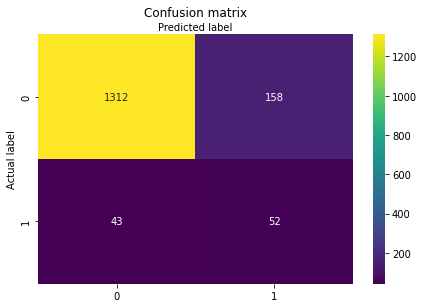

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.colormaps()
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusionMatrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [ ]:
recall_score(y_test,y_pred)

0.5473684210526316

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1470
           1       0.25      0.55      0.34        95

    accuracy                           0.87      1565
   macro avg       0.61      0.72      0.63      1565
weighted avg       0.92      0.87      0.89      1565



## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [ ]:
classifier = SVC(kernel='linear', random_state=1)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[1470,    0],
       [  95,    0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.939297124600639

In [ ]:
precision_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
recall_score(y_test,y_pred)

0.0

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1470
           1       0.00      0.00      0.00        95

    accuracy                           0.94      1565
   macro avg       0.47      0.50      0.48      1565
weighted avg       0.88      0.94      0.91      1565



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# model = SVC()
# model.fit(X_train,y_train)

In [ ]:
# model.score(X_test,y_test)

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# confusionMatrix = confusion_matrix(y_test, y_pred)
# confusionMatrix

In [ ]:
# accuracy_score(y_test, y_pred)

In [ ]:
# precision_score(y_test,y_pred,zero_division='warn',average='binary')

In [ ]:
# recall_score(y_test,y_pred)

In [ ]:
# lsvc = LinearSVC()
# lsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# accuracy_score(y_test, y_pred)

0.939297124600639

In [ ]:
# precision_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
# recall_score(y_test,y_pred)

0.0

In [ ]:
# score = lsvc.score(X_train, y_train)
# print("Score: ", score)

# cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
# print("CV average score: %.2f" % cv_scores.mean()+" ")

# y_pred = lsvc.predict(X_test)

In [ ]:
# confusionMatrix = confusion_matrix(y_test, y_pred)
# cr = classification_report(y_test, y_pred)
# print(cr)

Text(0.5, 257.44, 'Predicted label')

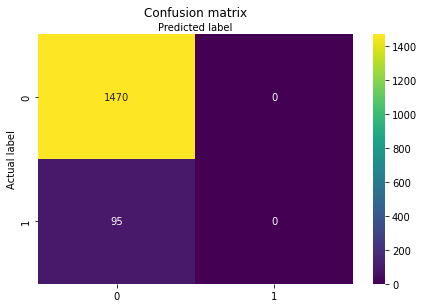

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.colormaps()
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusionMatrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

# K-Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

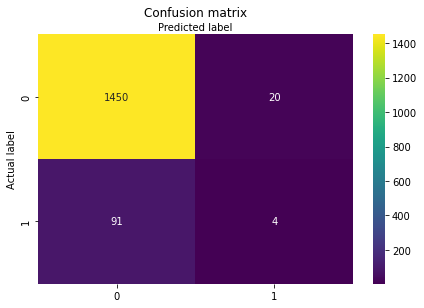

In [ ]:
class_names=[0,1] # name  of classes
# figsize=(3,3)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusionMatrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [ ]:
accuracy_score(y_test, y_pred)

0.929073482428115

In [ ]:
precision_score(y_test,y_pred)

0.16666666666666666

In [ ]:
recall_score(y_test,y_pred)

0.042105263157894736

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1470
           1       0.17      0.04      0.07        95

    accuracy                           0.93      1565
   macro avg       0.55      0.51      0.52      1565
weighted avg       0.89      0.93      0.91      1565

